## **MSc Major Research Project**
## **Exploring the effect of daytime physical activity on sleep quality**
Melania Czobit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Flatten, LSTM, GRU
from tensorflow.keras.layers import Activation, Dropout, Dense

from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/MRP/FitbitClean.csv'
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df

,date,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,...,weekday,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency,class
0,2015-08-01,67918.0,97.0,80.455666,14.178942,11419.0,10.0,637.0,217.0,30.0,...,5,23:53:00,9:00:00,548.0,5.0,0.0,495.0,48.0,0.911602,5
1,2015-08-02,67918.0,59.0,93.715698,10.107015,9042.0,10.0,1174.0,234.0,26.0,...,6,23:53:00,9:00:00,548.0,5.0,0.0,495.0,48.0,0.911602,5
2,2015-08-03,67918.0,97.0,77.604469,12.975431,6327.0,6.0,673.0,175.0,7.0,...,0,0:05:30,9:42:30,578.0,3.0,0.0,538.0,37.0,0.935652,5
3,2015-08-04,67918.0,59.0,90.791718,13.081469,13092.0,18.0,1118.0,205.0,35.0,...,1,0:05:30,9:42:30,578.0,3.0,0.0,538.0,37.0,0.935652,5
4,2015-08-05,67918.0,100.0,79.504982,14.706803,12689.0,47.0,563.0,261.0,15.0,...,2,23:13:00,9:00:00,588.0,2.0,0.0,547.0,39.0,0.933447,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45870,2016-07-28,36501.0,98.0,50.556137,13.650418,5965.0,6.0,647.0,183.0,26.0,...,3,23:31:30,9:26:30,596.0,0.0,0.0,538.0,58.0,0.902685,5
45871,2016-07-29,36501.0,97.0,52.905212,13.897326,8814.0,34.0,586.0,244.0,18.0,...,4,0:54:00,10:27:00,574.0,1.0,0.0,553.0,20.0,0.965096,5
45872,2016-07-30,36501.0,96.0,49.838959,8.438036,4890.0,11.0,698.0,248.0,4.0,...,5,2:15:30,10:19:30,485.0,5.0,0.0,449.0,31.0,0.935417,5
45873,2016-07-31,36501.0,93.0,52.419224,15.835029,10229.0,7.0,618.0,225.0,14.0,...,6,1:58:30,9:54:30,477.0,20.0,0.0,434.0,23.0,0.949672,5


In [4]:
df2 = df.drop(['timetobed','timeoutofbed','bedtimedur','minstofallasleep','minsafterwakeup','minsasleep','minsawake'],axis=1)
df2 = df2.sort_values(['date', 'egoid'])
df2 = df2.reset_index(drop=True)
df2.head()

,date,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,month,weekday,Efficiency,class
0,2015-08-01,11002.0,95.153846,79.716375,18.117793,14186.887363,17.392857,638.725275,249.824176,67.120879,58.013736,1105.151099,247.802198,4.189560,0.390110,8,5,0.947166,5
1,2015-08-01,11402.0,92.644258,80.514971,14.707312,11765.201681,50.683473,757.731092,213.078431,23.963585,45.697479,1176.742297,138.792717,4.691877,0.352941,8,5,0.932055,5
2,2015-08-01,14279.0,95.351955,74.965070,17.245022,9898.837989,15.092179,636.642458,240.019553,28.762570,23.561453,1206.195531,152.513966,3.611732,0.885475,8,5,0.923074,5
3,2015-08-01,14571.0,100.000000,79.816910,16.561857,15706.000000,25.000000,623.000000,218.000000,57.000000,42.000000,1221.000000,205.000000,5.000000,0.000000,8,5,0.928382,5
4,2015-08-01,14737.0,94.366477,74.216581,15.481568,13539.957386,14.017045,747.678977,244.068182,23.446023,38.519886,1253.980114,101.613636,1.241477,0.332386,8,5,0.923211,5


In [10]:
df_LSTM = df2.copy()
# df_LSTM['Last_day_sleep'] = df_LSTM.groupby(['egoid'])['Efficiency'].shift()
# df_LSTM['Last_day_Diff'] = df_LSTM.groupby(['egoid'])['Efficiency'].diff()
df_LSTM['Next_day_sleep'] = df_LSTM.groupby(['egoid'])['Efficiency'].shift(-1)
df_LSTM = df_LSTM.dropna()
df_LSTM

,date,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,month,weekday,Efficiency,class,Next_day_sleep
0,2015-08-01,11002.0,95.153846,79.716375,18.117793,14186.887363,17.392857,638.725275,249.824176,67.120879,58.013736,1105.151099,247.802198,4.189560,0.390110,8,5,0.947166,5,0.947166
1,2015-08-01,11402.0,92.644258,80.514971,14.707312,11765.201681,50.683473,757.731092,213.078431,23.963585,45.697479,1176.742297,138.792717,4.691877,0.352941,8,5,0.932055,5,0.932055
2,2015-08-01,14279.0,95.351955,74.965070,17.245022,9898.837989,15.092179,636.642458,240.019553,28.762570,23.561453,1206.195531,152.513966,3.611732,0.885475,8,5,0.923074,5,0.923074
3,2015-08-01,14571.0,100.000000,79.816910,16.561857,15706.000000,25.000000,623.000000,218.000000,57.000000,42.000000,1221.000000,205.000000,5.000000,0.000000,8,5,0.928382,5,0.870044
4,2015-08-01,14737.0,94.366477,74.216581,15.481568,13539.957386,14.017045,747.678977,244.068182,23.446023,38.519886,1253.980114,101.613636,1.241477,0.332386,8,5,0.923211,5,0.923211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45745,2016-07-31,98117.0,91.000000,73.599396,12.006024,1923.000000,0.000000,817.000000,118.000000,0.000000,0.000000,1282.000000,36.000000,0.000000,0.000000,7,6,0.989960,5,0.918410
45746,2016-07-31,98462.0,100.000000,72.115280,12.478164,12090.000000,7.000000,441.000000,409.000000,5.000000,4.000000,1423.000000,17.000000,0.000000,0.000000,7,6,0.915371,5,0.957187
45747,2016-07-31,98760.0,67.000000,60.901146,16.833178,11664.000000,8.000000,1102.000000,106.000000,51.000000,54.000000,918.000000,42.000000,1.000000,0.000000,7,6,0.881579,5,0.908932
45748,2016-07-31,98766.0,98.000000,69.155281,14.938157,15263.000000,21.000000,582.000000,225.000000,32.000000,55.000000,1308.000000,83.000000,0.000000,0.000000,7,6,0.968460,5,0.929062


In [11]:
df_T1 = df_LSTM.copy()
df_T1 = df_T1.set_index('date')
df_T1

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,month,weekday,Efficiency,class,Next_day_sleep
date,,,,,,,,,,,,,,,,,,,
2015-08-01,11002.0,95.153846,79.716375,18.117793,14186.887363,17.392857,638.725275,249.824176,67.120879,58.013736,1105.151099,247.802198,4.189560,0.390110,8,5,0.947166,5,0.947166
2015-08-01,11402.0,92.644258,80.514971,14.707312,11765.201681,50.683473,757.731092,213.078431,23.963585,45.697479,1176.742297,138.792717,4.691877,0.352941,8,5,0.932055,5,0.932055
2015-08-01,14279.0,95.351955,74.965070,17.245022,9898.837989,15.092179,636.642458,240.019553,28.762570,23.561453,1206.195531,152.513966,3.611732,0.885475,8,5,0.923074,5,0.923074
2015-08-01,14571.0,100.000000,79.816910,16.561857,15706.000000,25.000000,623.000000,218.000000,57.000000,42.000000,1221.000000,205.000000,5.000000,0.000000,8,5,0.928382,5,0.870044
2015-08-01,14737.0,94.366477,74.216581,15.481568,13539.957386,14.017045,747.678977,244.068182,23.446023,38.519886,1253.980114,101.613636,1.241477,0.332386,8,5,0.923211,5,0.923211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-31,98117.0,91.000000,73.599396,12.006024,1923.000000,0.000000,817.000000,118.000000,0.000000,0.000000,1282.000000,36.000000,0.000000,0.000000,7,6,0.989960,5,0.918410
2016-07-31,98462.0,100.000000,72.115280,12.478164,12090.000000,7.000000,441.000000,409.000000,5.000000,4.000000,1423.000000,17.000000,0.000000,0.000000,7,6,0.915371,5,0.957187
2016-07-31,98760.0,67.000000,60.901146,16.833178,11664.000000,8.000000,1102.000000,106.000000,51.000000,54.000000,918.000000,42.000000,1.000000,0.000000,7,6,0.881579,5,0.908932


In [12]:
df_T1['egoid'] = df_T1['egoid'].astype('object')
df_T1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45750 entries, 2015-08-01 to 2016-07-31
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   egoid                 45750 non-null  object 
 1   complypercent         45750 non-null  float64
 2   meanrate              45750 non-null  float64
 3   sdrate                45750 non-null  float64
 4   steps                 45750 non-null  float64
 5   floors                45750 non-null  float64
 6   sedentaryminutes      45750 non-null  float64
 7   lightlyactiveminutes  45750 non-null  float64
 8   fairlyactiveminutes   45750 non-null  float64
 9   veryactiveminutes     45750 non-null  float64
 10  lowrangemins          45750 non-null  float64
 11  fatburnmins           45750 non-null  float64
 12  cardiomins            45750 non-null  float64
 13  peakmins              45750 non-null  float64
 14  month                 45750 non-null  int64  
 15  weekday   

### Simple LSTM

In [30]:
# Simple LSTM
X = df_T1.drop(['complypercent','class','Efficiency','Next_day_sleep'], axis=1) 
y = df_T1['Next_day_sleep']
y = np.array(y)

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = np.array(X).reshape(X.shape[0], 1, X.shape[1])

rmse = []
mae = []
mape = []
train = pd.DataFrame()
val = pd.DataFrame()
tscv = TimeSeriesSplit(n_splits=5)
i=1
for train_index, test_index in tscv.split(X):

  X_train = X[train_index]
  X_train = X_train.reshape(X_train.shape[0], 1, 15)
  X_test = X[test_index]
  X_test = X_test.reshape(X_test.shape[0],1,15)
  y_train = y[train_index]
  y_test = y[test_index]

  model = Sequential()
  model.add(LSTM(64, activation='relu', input_shape=(1, 15)))
  model.add(Dropout(0.30))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mse'])
  history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test,y_test)) # validation_split=0.2 # shuffle=False
  y_pred = model.predict(X_test)
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  rmse.append(rmse_value)
  mae_value = metrics.mean_absolute_error(y_test, y_pred)
  mae.append(mae_value)
  mape_value = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  mape.append(mape_value)
  train[str(i)] = history.history['loss']
  val[str(i)] = history.history['val_loss']
  i += 1
print("Average MAE value: ", sum(mae)/len(mae))
print("Average MAPE value: ", sum(mape)/len(mape))
print("Average RMSE value: ", sum(rmse)/len(rmse))

Epoch 1/15
239/239 [==============================] - 4s 7ms/step - loss: 0.1376 - mse: 0.1376 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 2/15
239/239 [==============================] - 1s 5ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3/15
239/239 [==============================] - 2s 6ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 4/15
239/239 [==============================] - 1s 4ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5/15
239/239 [==============================] - 1s 4ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 6/15
239/239 [==============================] - 1s 4ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 7/15
239/239 [==============================] - 1s 4ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 8/15
239/239 [==============================] - 1s 4ms/step - loss: 0.

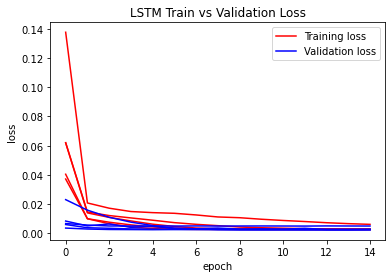

In [31]:
plt.plot(train, color='red', label='Training loss')
plt.plot(val, color='blue', label='Validation loss')
plt.title('LSTM Train vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')

plt.show()

### Stacked LSTM

In [33]:
# Stacked LSTM
X = df_T1.drop(['complypercent','class','Efficiency','Next_day_sleep'], axis=1) 
y = df_T1['Next_day_sleep']
y = np.array(y)

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = np.array(X).reshape(X.shape[0], 1, X.shape[1])

rmse = []
mae = []
mape = []
train_s = pd.DataFrame()
val_s = pd.DataFrame()
tscv = TimeSeriesSplit(n_splits=5)
i=1
for train_index, test_index in tscv.split(X):

  X_train = X[train_index]
  X_train = X_train.reshape(X_train.shape[0], 1, 15)
  X_test = X[test_index]
  X_test = X_test.reshape(X_test.shape[0],1,15)
  y_train = y[train_index]
  y_test = y[test_index]

  model2 = Sequential()
  model2.add(LSTM(128, activation='relu', input_shape=(1, 15), return_sequences = True))
  model2.add(Dropout(0.40))
  model2.add(LSTM(64, activation='relu', return_sequences = True))
  model2.add(Dropout(0.40))
  model2.add(LSTM(32, activation = 'relu'))
  model2.add(Dense(1))
  # model.summary()
  model2.compile(optimizer='adam', loss='mean_squared_error')
  history_s = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test))
  y_pred = model2.predict(X_test)
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  rmse.append(rmse_value)
  mae_value = metrics.mean_absolute_error(y_test, y_pred)
  mae.append(mae_value)
  mape_value = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  mape.append(mape_value)

  train_s[str(i)] = history_s.history['loss']
  val_s[str(i)] = history_s.history['val_loss']
  i += 1
print("Average MAE value: ", sum(mae)/len(mae))
print("Average MAPE value: ", sum(mape)/len(mape))
print("Average RMSE value: ", sum(rmse)/len(rmse))

Epoch 1/10
239/239 [==============================] - 8s 10ms/step - loss: 0.1613 - val_loss: 0.0036
Epoch 2/10
239/239 [==============================] - 2s 7ms/step - loss: 0.0118 - val_loss: 0.0027
Epoch 3/10
239/239 [==============================] - 2s 8ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 4/10
239/239 [==============================] - 2s 7ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 5/10
239/239 [==============================] - 2s 7ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 6/10
239/239 [==============================] - 2s 7ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 7/10
239/239 [==============================] - 2s 8ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 8/10
239/239 [==============================] - 2s 7ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 9/10
239/239 [==============================] - 3s 11ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 10/10
239/239 [==============================] - 2s 9ms/step - loss: 0.0038 - val_loss: 0.00

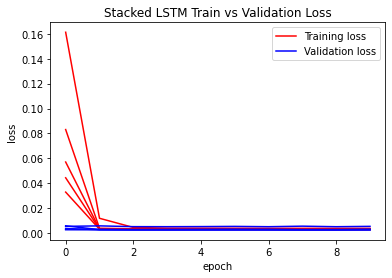

In [34]:
plt.plot(train_s, color='red', label='Training loss')
plt.plot(val_s, color='blue', label='Validation loss')
plt.title('Stacked LSTM Train vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')

plt.show()

### Bidirectional LSTM

In [38]:
# Bi-LSTM
train = df_T1.iloc[:-9150,:]
train['egoid'] = train['egoid'].astype('object')
test = df_T1.iloc[-9150:,:]

X_train = train.drop(['complypercent','class','Efficiency','Next_day_sleep'], axis=1) 
X_test = test.drop(['complypercent','class','Efficiency','Next_day_sleep'], axis=1) 
y_train = train['Next_day_sleep'] 
y_test = test['Next_day_sleep']

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)


X_train = np.array(X_train).reshape(train.shape[0], 1, 15)
X_test = np.array(X_test).reshape(test.shape[0], 1, 15)

rmse = []
model3 = Sequential()
model3.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(1,15)))
model3.add(Dropout(0.50))
model3.add(Bidirectional(LSTM(32)))
# model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.50))
model3.add(Dense(1))
# # model.summary()
model3.compile(optimizer='adam', loss='mse',  metrics=['mse'])
history_b = model3.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))
y_pred = model3.predict(X_test)
rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse.append(rmse_value)

print('RMSE: ', rmse)
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
1144/1144 [==============================] - 15s 6ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2/10
1144/1144 [==============================] - 6s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 3/10
1144/1144 [==============================] - 6s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4/10
1144/1144 [==============================] - 6s 5ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 5/10
1144/1144 [==============================] - 6s 5ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 6/10
1144/1144 [==============================] - 6s 6ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 7/10
1144/1144 [==============================] - 6s 5ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/10
1144/1144 [==============================] - 8s 7m

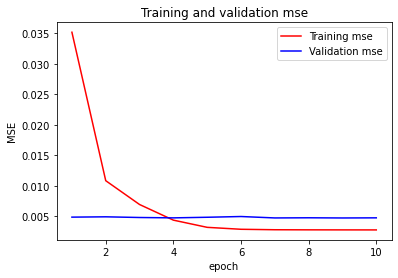

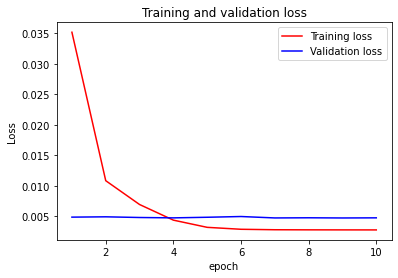

In [39]:
mse = history_b.history['mse']
val_mse = history_b.history['val_mse']
loss = history_b.history['loss']
val_loss = history_b.history['val_loss']
 
epochs = range(1, len(mse) + 1)
 
plt.plot(epochs, mse, 'r', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# Bidirectional LSTM
X = df_T1.drop(['complypercent','class','Efficiency','Next_day_sleep'], axis=1) 
y = df_T1['Next_day_sleep']
y = np.array(y)

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
# X = np.array(X).reshape(X.shape[0], 1, X.shape[1])


rmse = []
mae = []
mape = []
train_b = pd.DataFrame()
val_b = pd.DataFrame()
tscv = TimeSeriesSplit(n_splits=5)
i=1
for train_index, test_index in tscv.split(X):

  X_train = X[train_index]
  X_train = X_train.reshape(X_train.shape[0], 1, 15)
  X_test = X[test_index]
  X_test = X_test.reshape(X_test.shape[0],1,15)
  y_train = y[train_index]
  y_test = y[test_index]

  model3 = Sequential()
  model3.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(1,15)))
  model3.add(Dropout(0.40))
  model3.add(Bidirectional(LSTM(32)))
  # model3.add(Dense(32, activation='relu'))
  model3.add(Dropout(0.40))
  model3.add(Dense(1))
  model3.compile(optimizer='adam', loss='mse',  metrics=['mse'])
  history_b = model3.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test)) #batch_size=32, 
  y_pred = model2.predict(X_test)
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  rmse.append(rmse_value)
  mae_value = metrics.mean_absolute_error(y_test, y_pred)
  mae.append(mae_value)
  mape_value = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  mape.append(mape_value)

  train_b[str(i)] = history_b.history['loss']
  val_b[str(i)] = history_b.history['val_loss']
  i += 1
print("Average MAE value: ", sum(mae)/len(mae))
print("Average MAPE value: ", sum(mape)/len(mape))
print("Average RMSE value: ", sum(rmse)/len(rmse))

Epoch 1/15
239/239 [==============================] - 11s 16ms/step - loss: 0.0982 - mse: 0.0982 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2/15
239/239 [==============================] - 2s 8ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 3/15
239/239 [==============================] - 2s 8ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4/15
239/239 [==============================] - 2s 7ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 5/15
239/239 [==============================] - 2s 8ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 6/15
239/239 [==============================] - 2s 7ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 7/15
239/239 [==============================] - 2s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 8/15
239/239 [==============================] - 2s 7ms/step - loss: 

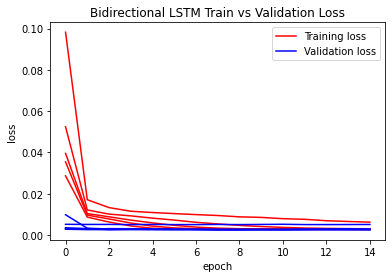

In [36]:
plt.plot(train_b, color='red', label='Training loss')
plt.plot(val_b, color='blue', label='Validation loss')
plt.title('Bidirectional LSTM Train vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')

plt.show()

### **Classification**

In [40]:
df_LSTM2 = df2.copy()
df_LSTM2['Next_day_class'] = df_LSTM2.groupby(['egoid'])['class'].shift(-1)

df_LSTM2['Next_day_class'] = df_LSTM2['Next_day_class'].astype('category')
df_LSTM2 = df_LSTM2.dropna()

df_T2 = df_LSTM2
df_T2 = df_T2.set_index('date')
df_T2

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,month,weekday,Efficiency,class,Next_day_class
date,,,,,,,,,,,,,,,,,,,
2015-08-01,11002.0,95.153846,79.716375,18.117793,14186.887363,17.392857,638.725275,249.824176,67.120879,58.013736,1105.151099,247.802198,4.189560,0.390110,8,5,0.947166,5,5.0
2015-08-01,11402.0,92.644258,80.514971,14.707312,11765.201681,50.683473,757.731092,213.078431,23.963585,45.697479,1176.742297,138.792717,4.691877,0.352941,8,5,0.932055,5,5.0
2015-08-01,14279.0,95.351955,74.965070,17.245022,9898.837989,15.092179,636.642458,240.019553,28.762570,23.561453,1206.195531,152.513966,3.611732,0.885475,8,5,0.923074,5,5.0
2015-08-01,14571.0,100.000000,79.816910,16.561857,15706.000000,25.000000,623.000000,218.000000,57.000000,42.000000,1221.000000,205.000000,5.000000,0.000000,8,5,0.928382,5,5.0
2015-08-01,14737.0,94.366477,74.216581,15.481568,13539.957386,14.017045,747.678977,244.068182,23.446023,38.519886,1253.980114,101.613636,1.241477,0.332386,8,5,0.923211,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-31,98117.0,91.000000,73.599396,12.006024,1923.000000,0.000000,817.000000,118.000000,0.000000,0.000000,1282.000000,36.000000,0.000000,0.000000,7,6,0.989960,5,5.0
2016-07-31,98462.0,100.000000,72.115280,12.478164,12090.000000,7.000000,441.000000,409.000000,5.000000,4.000000,1423.000000,17.000000,0.000000,0.000000,7,6,0.915371,5,5.0
2016-07-31,98760.0,67.000000,60.901146,16.833178,11664.000000,8.000000,1102.000000,106.000000,51.000000,54.000000,918.000000,42.000000,1.000000,0.000000,7,6,0.881579,5,5.0


In [42]:
df_T2['Next_day_class'] = df_T2['Next_day_class'].astype('category')
df_T2['egoid'] = df_T2['egoid'].astype('object')

In [43]:
train = df_T2.iloc[:-9150,:]
test = df_T2.iloc[-9150:,:]

X_train = train.drop(['Efficiency','class','Next_day_class'], axis=1) 
X_test = test.drop(['Efficiency','class','Next_day_class'], axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)


X_train = np.array(X_train).reshape(train.shape[0], 1, 16)
X_test = np.array(X_test).reshape(test.shape[0], 1, 16)

y_train = np.array(pd.get_dummies(train['Next_day_class']))
y_test = np.array(pd.get_dummies(test['Next_day_class']))

model3 = Sequential()
model3.add(LSTM(32, activation='relu', input_shape=(1,16)))
model3.add(Dropout(0.40))
model3.add(Dense(32, activation='relu'))
# model3.add(Dropout(0.40))
model3.add(Dense(5, activation='softmax'))
# # model.summary()
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
y_pred = model3.predict(X_test)
print('Accuracy: ', accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

Epoch 1/10
1144/1144 [==============================] - 5s 3ms/step - loss: 0.1451 - accuracy: 0.9863 - val_loss: 0.1269 - val_accuracy: 0.9813
Epoch 2/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0735 - accuracy: 0.9890 - val_loss: 0.1202 - val_accuracy: 0.9813
Epoch 3/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0700 - accuracy: 0.9890 - val_loss: 0.1262 - val_accuracy: 0.9813
Epoch 4/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0694 - accuracy: 0.9890 - val_loss: 0.1176 - val_accuracy: 0.9813
Epoch 5/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0683 - accuracy: 0.9890 - val_loss: 0.1213 - val_accuracy: 0.9813
Epoch 6/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0677 - accuracy: 0.9890 - val_loss: 0.1185 - val_accuracy: 0.9813
Epoch 7/10
1144/1144 [==============================] - 3s 3ms/step - loss: 0.0670 - accuracy: 0.9890 - val_loss: 0.1183 - val_accuracy: